# Выбор локации для скважины

 ### Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Цель проекта:

Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

### Описание данных  

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

**Условия задачи**  
  
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

### План выполнения проекта:  

**Шаг 0.** Импорт библиотек  
**Шаг 1.** Загрузка и подготовка данных  
**Шаг 2.** Обучение и провека модели  
**Шаг 3.** Подготовка к расчёту прибыли  
**Шаг 4.** Расчёт прибыли и рисков  
**Шаг 5.** Общий вывод  

## Импорт библиотек

In [ ]:
!pip install phik -q
!pip install scikit-learn==1.1.3 -q
import pandas as pd
import numpy as np
import phik
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy import stats
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")
from numpy.random import RandomState

## Загрузка и подготовка данных

### Загрузка данных

In [ ]:
def review_df(df):
    display(df.info())
    display(df.head())

In [ ]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
review_df(df_0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
review_df(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
review_df(df_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Данные соответствуют описанию, пропусков нет.

### Предобработка данных

In [ ]:
dfs = [df_0, df_1, df_2]

print('Явных дубликатов:')
for df in dfs:
    print(df.duplicated().sum())

print('\nДубликатов по id:')
for df in dfs:
    print(len(df['id'].unique()))

Явных дубликатов:
0
0
0

Дубликатов по id:
99990
99996
99996


Видим что есть одинаковые id для разных данных

In [ ]:
for df in dfs:
    dubl = df['id'].value_counts()[df['id'].value_counts() > 1].index
    result = df[df['id'].isin(dubl)].sort_values('id')
    display(result)

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


Дубликаты имеют сильно разнящиеся данные (скорее всего имеет место быть человеческий фактор при заполонении id) выявить истинный невозможно, но при этом сам id не имеет значимости для модели, следовательно оставим все как есть, а сам признак id удалим.

In [ ]:
df_0 = df_0.drop(['id'], axis=1)
df_1 = df_1.drop(['id'], axis=1)
df_2 = df_2.drop(['id'], axis=1)
print(df_0.duplicated().sum(), df_1.duplicated().sum(), df_2.duplicated().sum())
dfs = [df_0, df_1, df_2]

0 0 0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Молодец, что проверил дубликаты по `id`.

### Исследовательский анализ данных

In [ ]:
def analysis_df(df):

    for column in df.columns.tolist():

        display(Markdown(f"<center><strong>Признак {column}</strong></center>"))
        display(df[column].describe().round(2))

        sns.set(rc={"figure.figsize": (20, 5)}, style="whitegrid")
        fig, axes = plt.subplots(1, 2)

        #используем histplot
        sns.histplot(
                df[column],
                bins=100,
                ax=axes[0],
                color='olive',
                edgecolor='black',
                linewidth=1.2
            )
        axes[0].set(
                ylabel='Частота',
                xlabel=column,
                title=f'Распределение непрерывного признака {column}'
            )

        box = sns.boxplot(
                          df[column],
                          ax=axes[1],
                          color='olive',
                          linewidth=2,
                          flierprops={
                                      'markerfacecolor': 'olive',
                                      'markeredgecolor': 'black',
                                      'markersize': 8
                                      }
                         )

        axes[1].set(ylabel=column, title=f'Boxplot для {column}')

        for ax in axes:
            ax.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

        alpha = 0.05
        stat, p_value = stats.shapiro(df[column].dropna())

        print(f"\033[1mH0:\033[0m распределение нормальное.\n\033[1mH1:\033[0m распределение ненормальное.")
        print('p-value:', p_value)

        if p_value < alpha:
            print('Отвергаем нулевую гипотезу')
        else:
            print('Не получилось отвергнуть нулевую гипотезу')

In [ ]:
def phik_corr(df):
    plt.figure(figsize=(8,5))
    heatmap = sns.heatmap(
                df[df.columns[df.columns != 'id']]\
                [list(df[df.columns[df.columns != 'id']].columns)]\
                .phik_matrix(interval_cols = df.columns[df.columns != 'id']),
                annot=True,
                cmap='YlGn'
                )

    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=15)

    plt.title('Тепловая карта корреляций', fontsize=25)
    plt.show()

#### Графики для первого региона

<center><strong>Признак f0</strong></center>

count    100000.00
mean          0.50
std           0.87
min          -1.41
25%          -0.07
50%           0.50
75%           1.07
max           2.36
Name: f0, dtype: float64

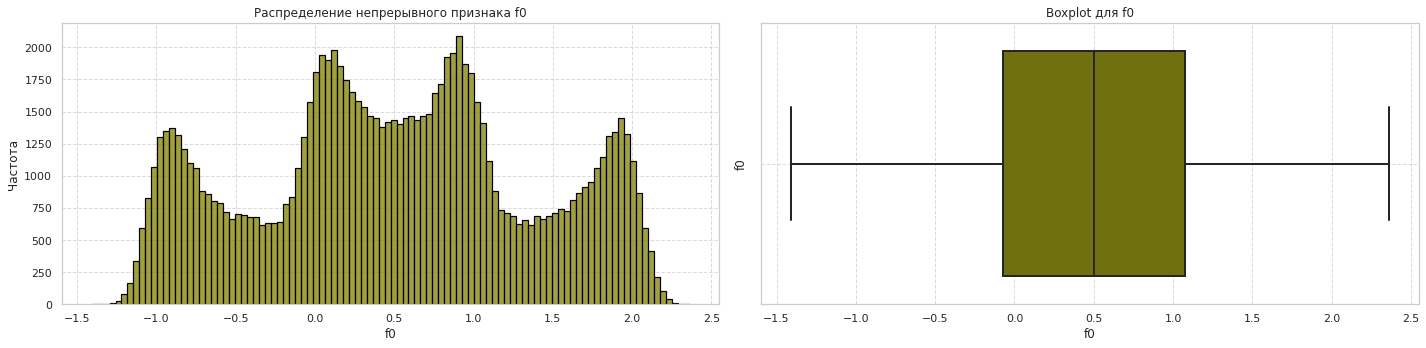

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.0
Отвергаем нулевую гипотезу


<center><strong>Признак f1</strong></center>

count    100000.00
mean          0.25
std           0.50
min          -0.85
25%          -0.20
50%           0.25
75%           0.70
max           1.34
Name: f1, dtype: float64

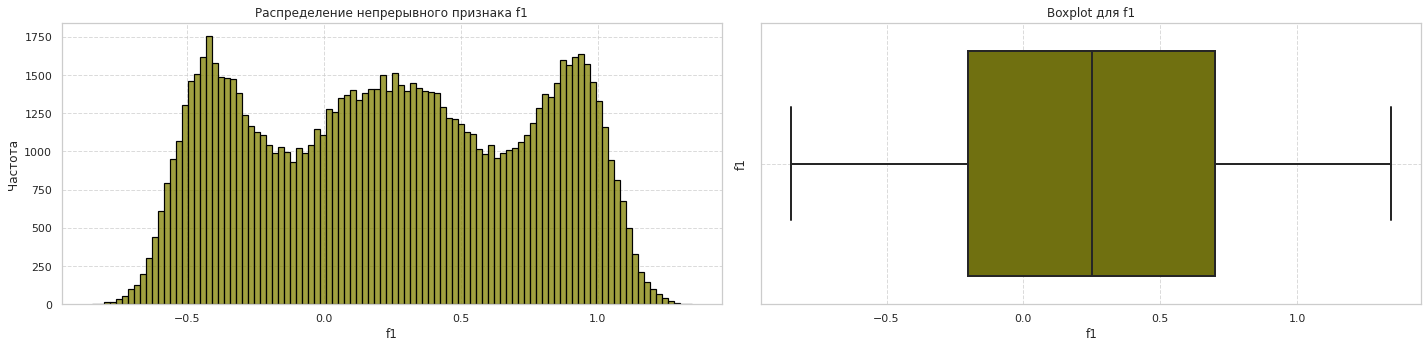

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.0
Отвергаем нулевую гипотезу


<center><strong>Признак f2</strong></center>

count    100000.00
mean          2.50
std           3.25
min         -12.09
25%           0.29
50%           2.52
75%           4.72
max          16.00
Name: f2, dtype: float64

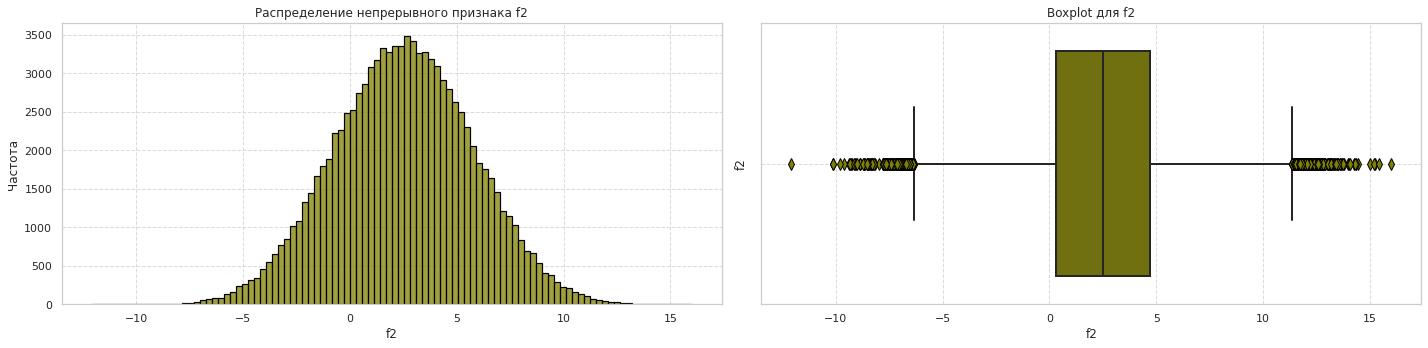

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 8.351793439942412e-06
Отвергаем нулевую гипотезу


<center><strong>Признак product</strong></center>

count    100000.00
mean         92.50
std          44.29
min           0.00
25%          56.50
50%          91.85
75%         128.56
max         185.36
Name: product, dtype: float64

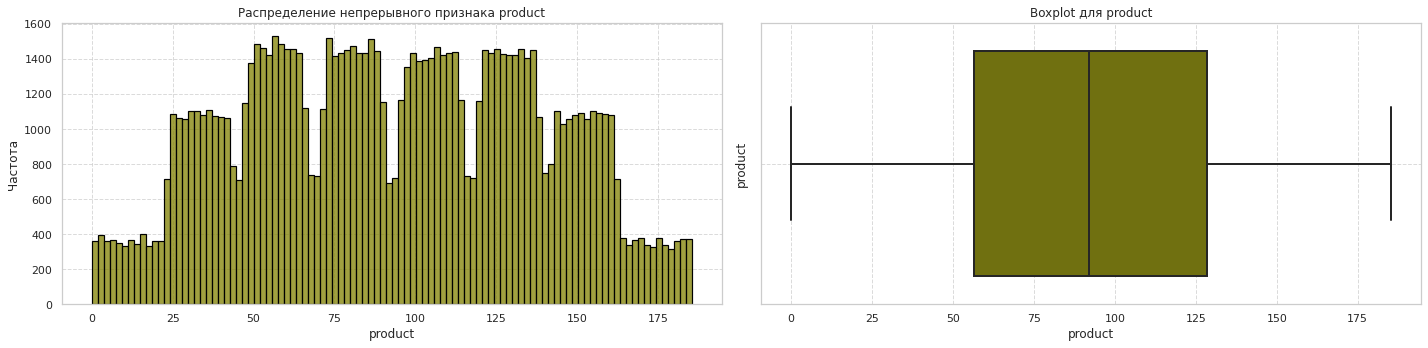

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.0
Отвергаем нулевую гипотезу


In [ ]:
analysis_df(df_0)

- Признаки распределены ненормально;
- Аномальных значений нет.  
  
  Посмотрим на корреляцию между признаками

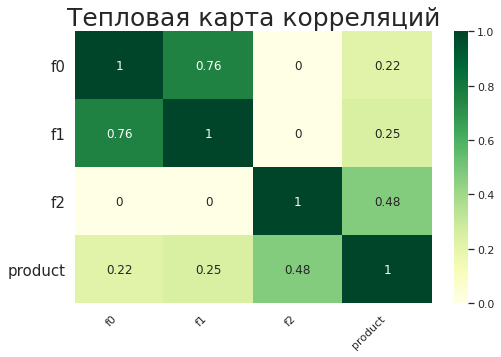

In [ ]:
phik_corr(df_0)

С уверенностью можем говорить об отсутствии мультиколлинеарности.

#### Графики для второго региона

<center><strong>Признак f0</strong></center>

count    100000.00
mean          1.14
std           8.97
min         -31.61
25%          -6.30
50%           1.15
75%           8.62
max          29.42
Name: f0, dtype: float64

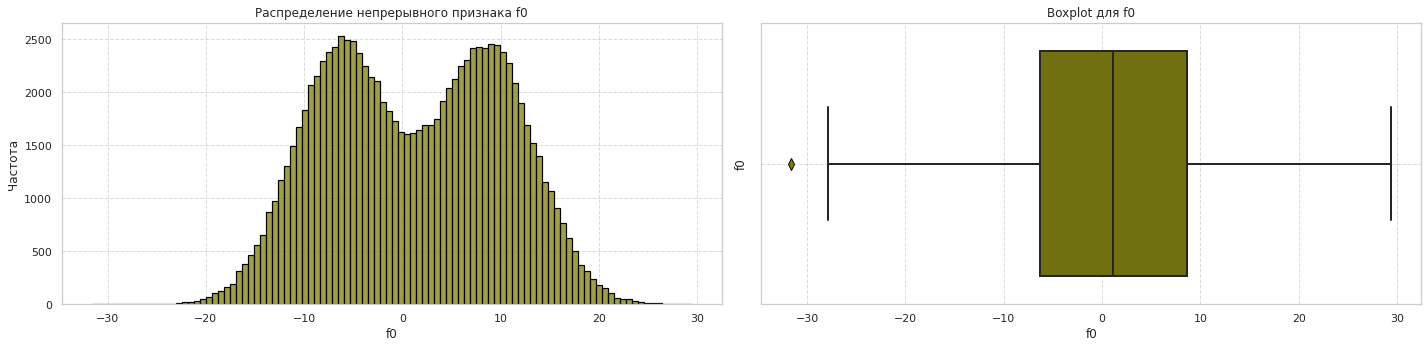

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.0
Отвергаем нулевую гипотезу


<center><strong>Признак f1</strong></center>

count    100000.00
mean         -4.80
std           5.12
min         -26.36
25%          -8.27
50%          -4.81
75%          -1.33
max          18.73
Name: f1, dtype: float64

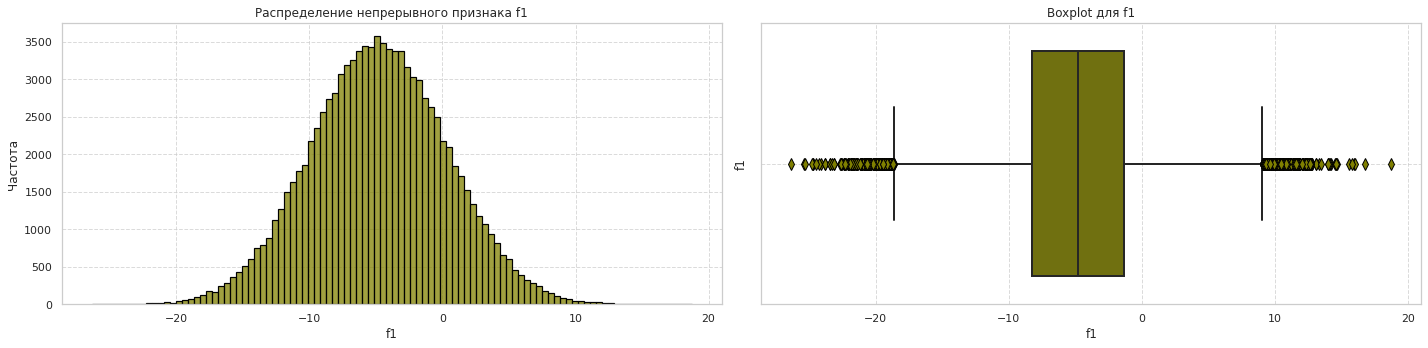

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.30398082733154297
Не получилось отвергнуть нулевую гипотезу


<center><strong>Признак f2</strong></center>

count    100000.00
mean          2.49
std           1.70
min          -0.02
25%           1.00
50%           2.01
75%           4.00
max           5.02
Name: f2, dtype: float64

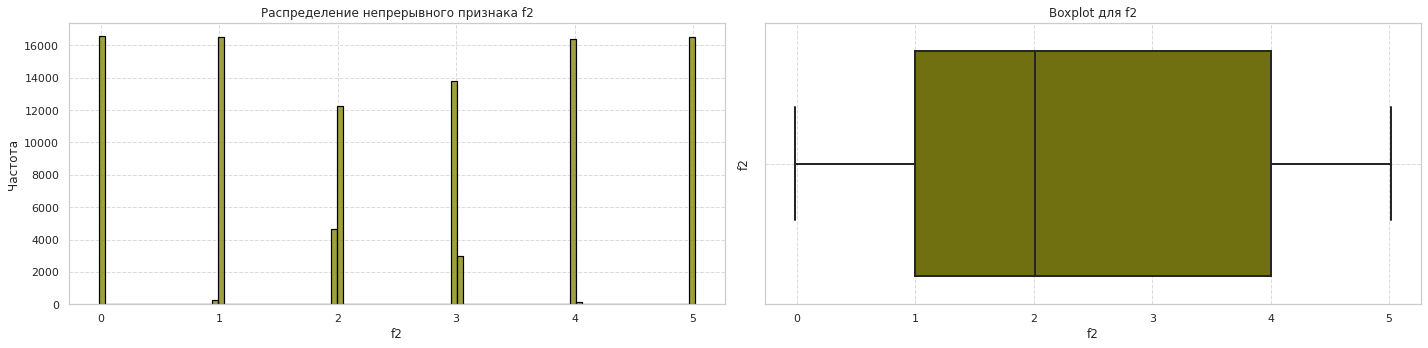

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.0
Отвергаем нулевую гипотезу


<center><strong>Признак product</strong></center>

count    100000.00
mean         68.83
std          45.94
min           0.00
25%          26.95
50%          57.09
75%         107.81
max         137.95
Name: product, dtype: float64

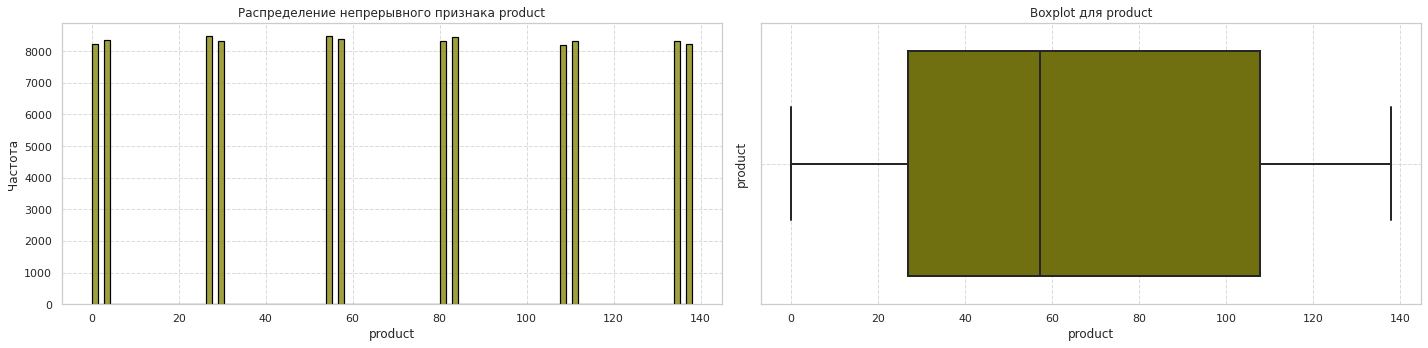

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.0
Отвергаем нулевую гипотезу


In [ ]:
analysis_df(df_1)

- Нормально распределен лишь признак f1;
- Признаки f2 и product имеют странное распределение рассмотрим их ближе.

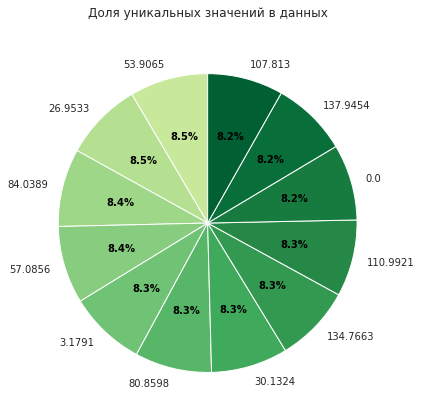

In [ ]:
product_value = df_1['product'].round(4).value_counts(normalize=True)

plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(product_value,
                                   labels=product_value.index,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=plt.cm.YlGn(np.linspace(0.3, 0.9, len(product_value))))

plt.setp(texts, size=10)
plt.setp(autotexts, size=10, color="black", weight="bold")

plt.title('Доля уникальных значений в данных', pad=20)
plt.ylabel('')
plt.tight_layout()
plt.show()

Как видим на 100000 точек мы имеем всего 12 уникальных значений, доли которых близки. Очень похоже, что эти данные были созданы искуственно, либо с ошибкой. Стоит учесть это в дальнейшем.

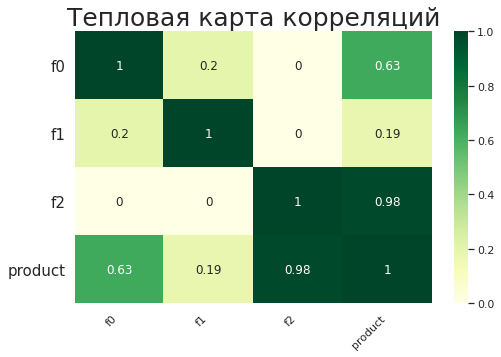

In [ ]:
phik_corr(df_1)

Как мы видим корреляция между признаком f2 и  целевым признаком product очень высока, но так как о сути самих данных мы можем лишь предполагать и для обучения модели подходит только линейная регрессия (из условий задачи), оставим все неизменно.

#### Графики для третьего региона

<center><strong>Признак f0</strong></center>

count    100000.00
mean          0.00
std           1.73
min          -8.76
25%          -1.16
50%           0.01
75%           1.16
max           7.24
Name: f0, dtype: float64

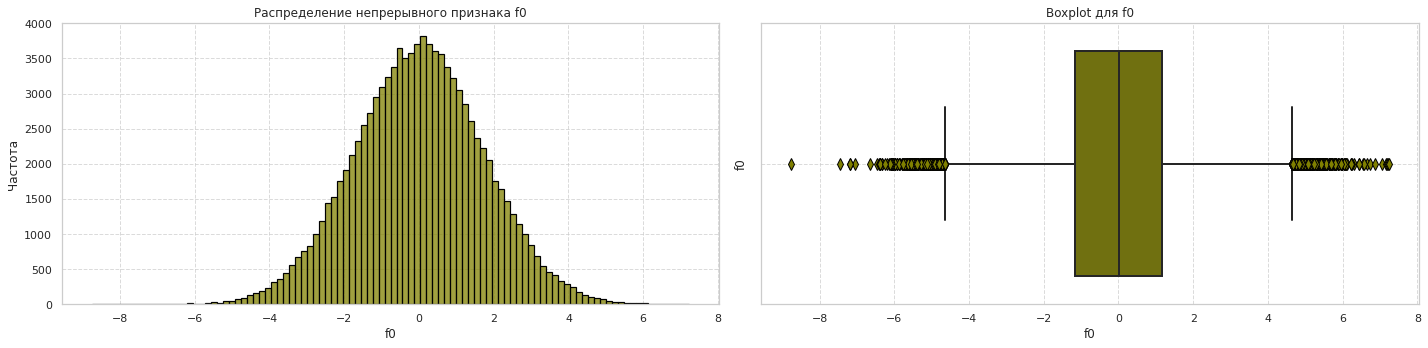

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.6420857310295105
Не получилось отвергнуть нулевую гипотезу


<center><strong>Признак f1</strong></center>

count    100000.00
mean         -0.00
std           1.73
min          -7.08
25%          -1.17
50%          -0.01
75%           1.16
max           7.84
Name: f1, dtype: float64

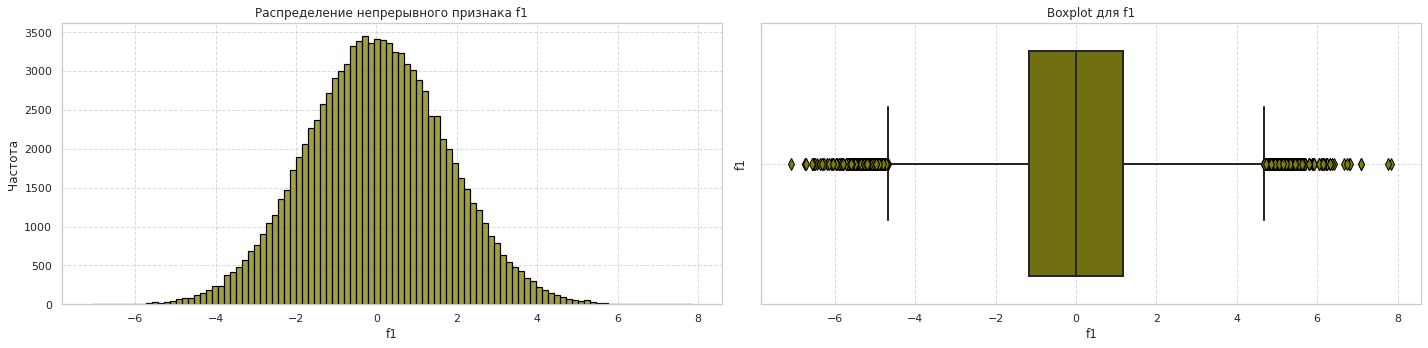

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.9895228147506714
Не получилось отвергнуть нулевую гипотезу


<center><strong>Признак f2</strong></center>

count    100000.00
mean          2.50
std           3.47
min         -11.97
25%           0.13
50%           2.48
75%           4.86
max          16.74
Name: f2, dtype: float64

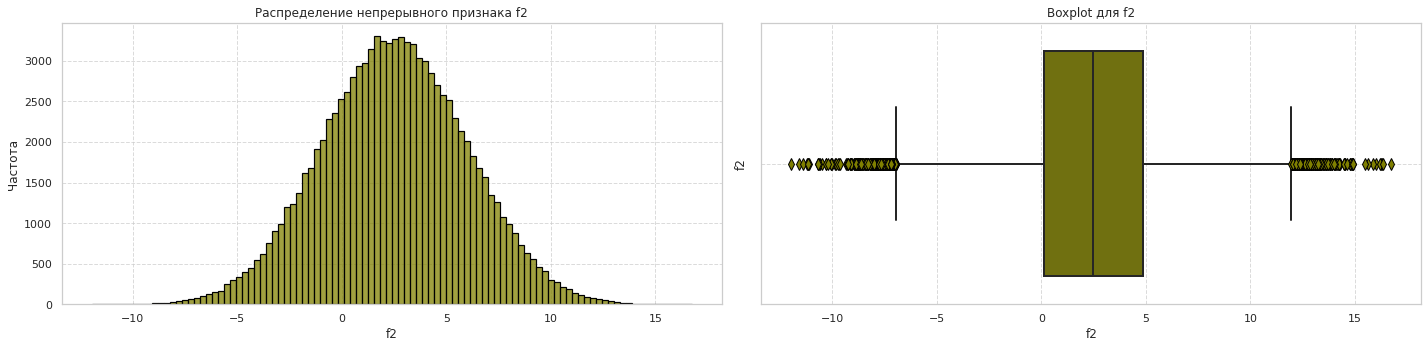

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.0038391456473618746
Отвергаем нулевую гипотезу


<center><strong>Признак product</strong></center>

count    100000.00
mean         95.00
std          44.75
min           0.00
25%          59.45
50%          94.93
75%         130.60
max         190.03
Name: product, dtype: float64

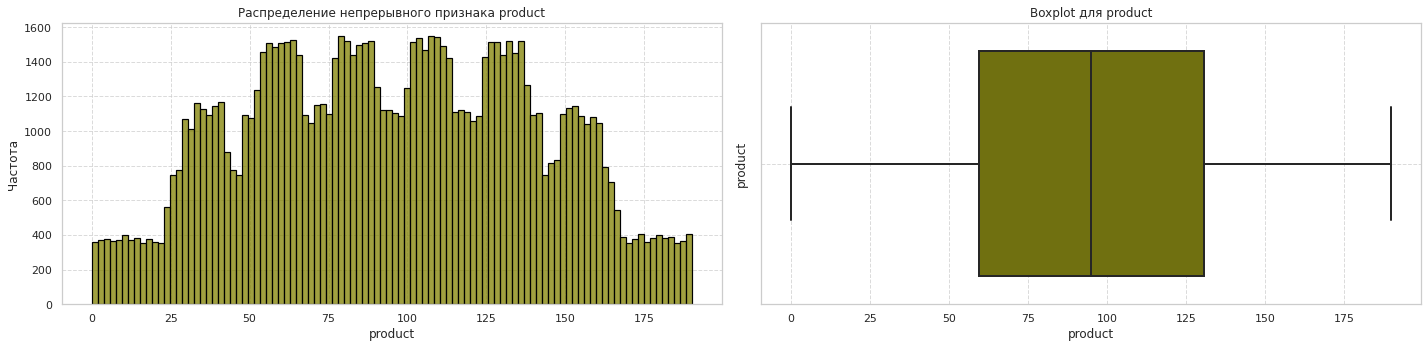

H0: распределение нормальное.
H1: распределение ненормальное.
p-value: 0.0
Отвергаем нулевую гипотезу


In [ ]:
analysis_df(df_2)

- Признаки f0 и f1 распределены нормально;
- Аномальных значений нет.  
  
  Посмотрим на корреляцию между признаками

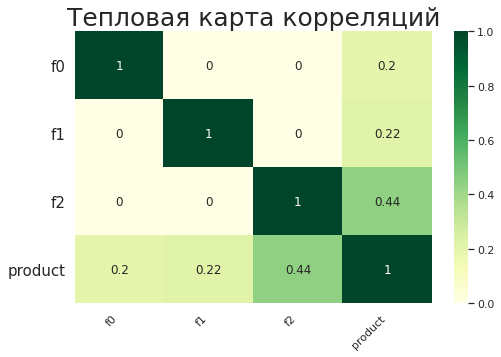

In [ ]:
phik_corr(df_2)

С уверенностью можем говорить об отсутствии мультиколлинеарности.

## Обучение и проверка модели

In [ ]:
def model(df, region, reg_type='linear'):

    X = df.drop(['product'], axis=1)
    y = df['product']
    X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        test_size=0.25,
        random_state=12345
    )

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)

    model = LinearRegression(normalize=False)
    model.fit(X_train_scaled, y_train)
    y_pred = pd.Series(model.predict(X_valid_scaled))

    rmse = mean_squared_error(y_valid, y_pred) ** 0.5

    print(f"\033[1m{region} регион\033[0m ")
    print(f'RMSE: {rmse:.2f}')
    print(f'Средние объема заспасов:\n\
    Из полученых данных - {y.mean():.2f} тыс. баррелей\n\
    Предсказанных - {y_pred.mean():.2f} тыс. баррелей\n')

    df_pred = pd.concat([y_pred, y_valid.reset_index(drop=True)], axis=1)
    df_pred.columns = ['pred', 'valid']
    return df_pred

In [ ]:
df_pred_0 = model(df_0, 'Первый')
df_pred_1 = model(df_1, 'Второй', 'lasso')
df_pred_2 = model(df_2, 'Третий')
dfs_pred = [df_pred_0, df_pred_1, df_pred_2]

Первый регион 
RMSE: 37.58
Средние объема заспасов:
    Из полученых данных - 92.50 тыс. баррелей
    Предсказанных - 92.59 тыс. баррелей

Второй регион 
RMSE: 0.89
Средние объема заспасов:
    Из полученых данных - 68.83 тыс. баррелей
    Предсказанных - 68.73 тыс. баррелей

Третий регион 
RMSE: 40.03
Средние объема заспасов:
    Из полученых данных - 95.00 тыс. баррелей
    Предсказанных - 94.97 тыс. баррелей



**Вывод по обучению модели:**
- Лучший показатель среднеквадратической ошибки у второго региона;  
- Второй регион обладает наименьшим средним предсказанным объёмом запасов;
- Средние объёмы же запасов первого и третьего регионов близки как в случае передоставленных данных, так и предсказанных.

## Подготовка к расчёту прибыли

Исходя из условий задачи имеем следующее:

In [ ]:
POINTS = 500 #количество точек для исследования
POINTS_BEST = 200 #количество лучших точек
BUDGET = 10 ** 10 #бюджет
REVENUE_PER_UNIT = 450000 #выручка с единицы продукта (тыс. баррелей)
PROBAILITY_OF_LOSS = 0.025 #вероятность убытков

In [ ]:
profit_per_point = BUDGET / POINTS_BEST
print(f'Порог добычи при котором компания не получит убытков с точки\
- {round(profit_per_point / REVENUE_PER_UNIT, 2)} тыс. баррелей для одной точки')

Порог добычи при котором компания не получит убытков с точки- 111.11 тыс. баррелей для одной точки


Этот порог добычи выше всех средних показателей добычи по всем регионам.

## Расчёт прибыли и рисков

In [ ]:
#расчет прибыли с 200 лучших точек
def profit(df):
    df_sort = df.sort_values(by= 'pred', ascending=False).head(200)
    return REVENUE_PER_UNIT * df_sort['valid'].sum() - BUDGET

In [ ]:
#расчет рисков спомощью бутстреп
def bootstrap(df):

    state = np.random.RandomState(12345)

    values = []
    for i in range(1000):
        target_subsample = df.sample(n=POINTS, replace=True, random_state=state)
        values.append(profit(target_subsample))

    values = pd.Series(values)

    lower = values.quantile(0.025)
    upper = values.quantile(0.975)

    mean_profit = values.mean()

    sigma = np.std(values)

    distr = st.norm(mean_profit, sigma)
    x = 0
    result = distr.cdf(x)

    print(f'Средняя прибыль: \033[1m{mean_profit / 1e9:.3f}\033[0m млрд. руб.')
    print(f'Доверительный интервал: \033[1m{lower / 1e9:.3f} – {upper / 1e9:.3f}\033[0m млрд. руб.')
    print(f'Риск убытков: \033[1m{result:.2%}\033[0m')

### Прибыль

In [ ]:
for i, df in enumerate(dfs_pred):
    print(f'Прибыль с региона {i + 1 }: {profit(df) / 1e9:.3f} млрд. руб.')

Прибыль с региона 1: 3.321 млрд. руб.
Прибыль с региона 2: 2.415 млрд. руб.
Прибыль с региона 3: 2.710 млрд. руб.


### Риски

In [ ]:
for i, df in enumerate(dfs_pred):
    print(f'Регион {i + 1}:')
    print(f'{bootstrap(df)}\n')

Регион 1:
Средняя прибыль: 0.396 млрд. руб.
Доверительный интервал: -0.111 – 0.910 млрд. руб.
Риск убытков: 6.86%
None

Регион 2:
Средняя прибыль: 0.456 млрд. руб.
Доверительный интервал: 0.034 – 0.852 млрд. руб.
Риск убытков: 1.41%
None

Регион 3:
Средняя прибыль: 0.404 млрд. руб.
Доверительный интервал: -0.163 – 0.950 млрд. руб.
Риск убытков: 6.94%
None



## Общий вывод

При выполнении проекта были сделаны следующие шаги:

- Изучены данные и подготовлены данные к обучению модели.
- Для каждого региона из трех, была обучена модель для предсказания объёма добываемого сырья. Лучшей моделью стала модель для второго региона,  метрика RMSE у которой равна 0,89.
- Определены константы в соответствии с условиями задачи и расчитан порог безубыточности.
- Произведен расчет прибыли в каждом регионе. Выявлены доверительные интервалы и просчитаны риски.  
  
На основе выполненых действий можно предположить, что **лучшим для разработки будет 2 регион**, как регион с **риском убытков 1,41%**, что соответствует условию задачи <2,5%, а так же с наивысшим значением **средней прибыли 456 млн. руб.**. Но стоит уточнить, что данные из датафрема соответствующему этому региону очень сильно похожи на созданные искуственно, и стоит с опаской относится к пресказаниями с этими данными.
<br>  
<br>  
<center><strong>Рекомендации:</strong></center>  
Стоит сделать запрос к заказчику, о подлинности и адекватности данных по второму региону.<br>
Дополнить, по возможности, новыми входными признаками.<br>
Возможно, так же стоит пересмотреть пороговые значения риска убытка.